In [1]:
# import
from pytrends.request import TrendReq
from itertools import zip_longest
from itertools import filterfalse
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
pytrends = TrendReq(hl='ja-JP', tz=360)

In [15]:
results = []

In [26]:
# キーワードリスト

kw_list = ['徳永エリ','鉢呂吉雄','柿木克弘','森英士','佐藤和夫','中村治','飯田佳宏','森山佳則','水越寛陽']


In [27]:
# 主キーワード      
primary_kw = '長谷川岳'
group_by = 4
chunks = zip_longest(*[iter(kw_list)]*group_by)
p = lambda x: x is None

In [28]:
merged_df = None
for elems in list(chunks):
    elems = list(filterfalse(p, elems))
    elems.append(primary_kw)
    pytrends.build_payload(elems, cat=0, timeframe='2016-07-01 2016-07-10', geo='JP-13', gprop='')
    df = pytrends.interest_over_time()
    # 取得結果のスコアは String になる。 float 変換したいので、True/False　が設定されている`isPartial` を削除して float に変換する。   
    del df['isPartial']
    df = df.astype('float64')
    # dataframe　を primary_kw で最大値で正規化する 
    scaled_dataframe = df.div(df[primary_kw].max(), axis=0)
    if merged_df is None:
        merged_df = scaled_dataframe
    else:
        # ValueError: columns overlap but no suffix specified が発生するので、やむなく、'postgresql' を削除
        del scaled_dataframe[primary_kw]
        merged_df = merged_df.join(scaled_dataframe)


In [29]:
# Dataframe を表示
merged_df

,徳永エリ,鉢呂吉雄,柿木克弘,森英士,長谷川岳,佐藤和夫,中村治,飯田佳宏,森山佳則,水越寛陽
date,,,,,,,,,,
2016-07-01,0.157303,0.000000,0.157303,0.0,0.157303,0.00,0.16,0.00,0.0,0.00
2016-07-02,0.168539,0.000000,0.168539,0.0,0.168539,0.18,0.00,0.00,0.0,0.00
2016-07-03,0.000000,0.000000,0.000000,0.0,0.168539,0.18,0.00,0.00,0.0,0.00
2016-07-04,0.000000,0.000000,0.146067,0.0,0.000000,0.15,0.00,0.15,0.0,0.00
2016-07-05,0.146067,0.000000,0.000000,0.0,0.146067,0.00,0.00,0.00,0.0,0.00
2016-07-06,0.000000,0.000000,0.000000,0.0,0.146067,0.31,0.00,0.15,0.0,0.15
2016-07-07,0.000000,0.157303,0.000000,0.0,0.000000,0.00,0.00,0.00,0.0,0.15
2016-07-08,0.157303,0.000000,0.000000,0.0,0.235955,0.16,0.16,0.00,0.0,0.15
2016-07-09,0.179775,0.269663,0.179775,0.0,0.539326,0.00,0.00,0.00,0.0,0.35


In [31]:
merged_df.mean()

徳永エリ    0.193258
鉢呂吉雄    0.113483
柿木克弘    0.094382
森英士     0.000000
長谷川岳    0.256180
佐藤和夫    0.116000
中村治     0.032000
飯田佳宏    0.030000
森山佳則    0.000000
水越寛陽    0.080000
dtype: float64

In [33]:
merged_df.mean()/merged_df.mean().mean()

徳永エリ    2.111414
鉢呂吉雄    1.239842
柿木克弘    1.031156
森英士     0.000000
長谷川岳    2.798851
佐藤和夫    1.267339
中村治     0.349611
飯田佳宏    0.327760
森山佳則    0.000000
水越寛陽    0.874027
dtype: float64

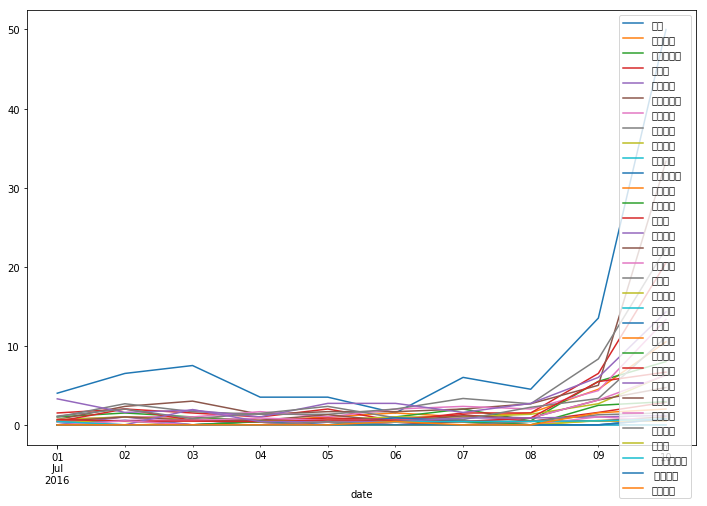

In [14]:
merged_df.plot(figsize=(12,8))

In [23]:
data = pd.read_excel("2016候補者.xlsx")
data.head()

,JP番号,県,キーワードリスト
0,1,北海道,"長谷川岳','徳永エリ','鉢呂吉雄','柿木克弘','森英士','佐藤和夫','中村治',..."
1,2,青森,"田名部匡代','山崎力','三國佑貴'"
2,3,岩手,"木戸口英司','田中真一','石川幹子'"
3,4,宮城,"桜井充','熊谷大','油井哲史'"
4,5,秋田,"石井浩郎','松浦大悟','西野晃'"


In [25]:
type(data["キーワードリスト"])

pandas.core.series.Series

In [ ]:
for i in a:
    